# Import Libraries

In [603]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy import stats

# Import Kendaraan Dataset

In [604]:
dataset = pd.read_csv('kendaraan_train.csv')
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Data Exploration and Data Preprocessing
### Show some statistical data

In [605]:
dataset.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Check NaN values

In [606]:
dataset.isna()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,False,False,False,False,False,False,False,False,False,False,False,False
285827,False,False,False,False,False,False,False,False,False,False,False,False
285828,False,False,False,False,False,False,False,False,False,False,False,False
285829,False,False,False,False,False,False,False,False,False,False,False,False


### Drop NaN values

In [607]:
dataset = dataset.dropna()
dataset

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


### Transfer categorical data to numeric

In [608]:
dataset['Jenis_Kelamin'] = dataset['Jenis_Kelamin'].map({'Pria':0, 'Wanita':1})
dataset['Umur_Kendaraan'] = dataset['Umur_Kendaraan'].map({'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2})
dataset['Kendaraan_Rusak'] = dataset['Kendaraan_Rusak'].map({'Tidak':0, 'Pernah':1})
dataset

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,1,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0,0
285827,285828,1,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0,0
285828,285829,1,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0,0
285829,285830,0,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0,0


### Check outliers

<AxesSubplot:>

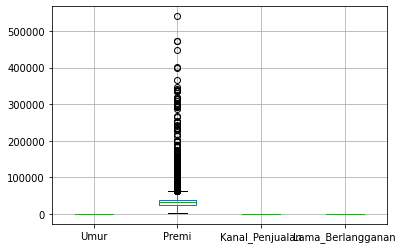

In [609]:
dataset[['Umur', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']].boxplot()

### Drop outliers using Z-score method
Z-score > 3 is considered as outlier

In [610]:
z_score = np.abs(stats.zscore(dataset[['Umur', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']]))
threshold = 3

new_data = dataset[(z_score < 3).all(axis = 1)]
new_data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,1,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0,0
285827,285828,1,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0,0
285828,285829,1,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0,0
285829,285830,0,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0,0


### Correlation Heatmap
We also consider feature selection in this process

Text(0.5, 1.0, 'Kendaraan Dataset Correlation')

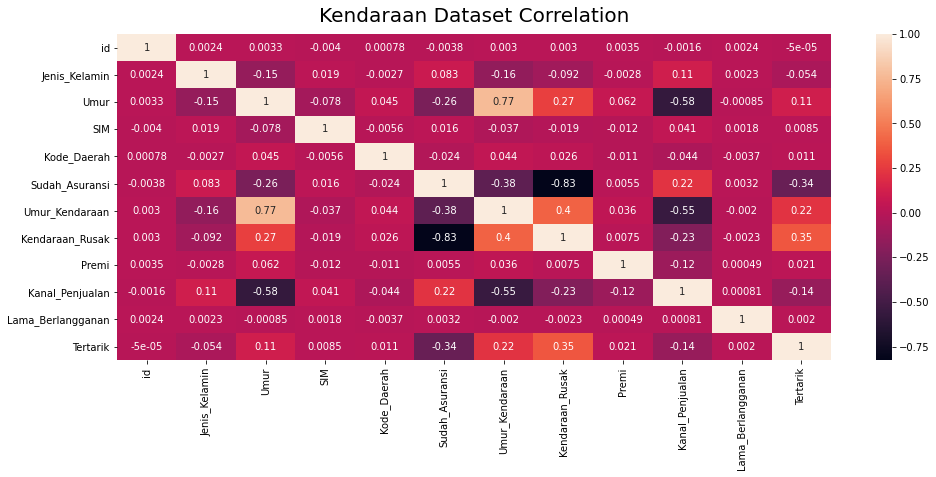

In [611]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(new_data.corr(), annot=True)
heatmap.set_title('Kendaraan Dataset Correlation' ,fontdict={'fontsize':20}, pad=12)

In [612]:
data_used = new_data[['Umur', 'Kanal_Penjualan']]
data_used

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
3,58.0,124.0
5,21.0,152.0
8,20.0,160.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


# Clustering

### Euclidean Distance

In [613]:
def euclid_dist(d1, d2):
      squares = [(p-q) ** 2 for p, q in zip(d1, d2)]
      return sum(squares) ** .5

### K-Means Algorithm

In [614]:
def KMeans(K, data_used):
    stop = False
    # Select K Points as initial centroids
    centroids = data_used.sample(n=K).values.tolist()
    while not stop:
        clusters = [[] for _ in range(K)]
        ## Form K clusters by assigning each point to its closest centroids
        for row in data_used.values.tolist():
            min_dist = 10**128
            min_centroids = -1
            for i in range(len(centroids)):
                dist = euclid_dist(centroids[i], row)
                if dist < min_dist:
                    min_centroids = i
                    min_dist = dist
            clusters[min_centroids].append(row)
        ## Recompute the centroid of each clusters
        temp_centroid = copy.deepcopy(centroids)
        for i in range(len(centroids)):
            centroids[i] = np.mean(clusters[i], axis = 0)
        condition = np.array(centroids) == np.array(temp_centroid)
        # print(condition)
        if condition.all():
            stop = True

    return clusters, centroids

### Visualize clusters with K = 3

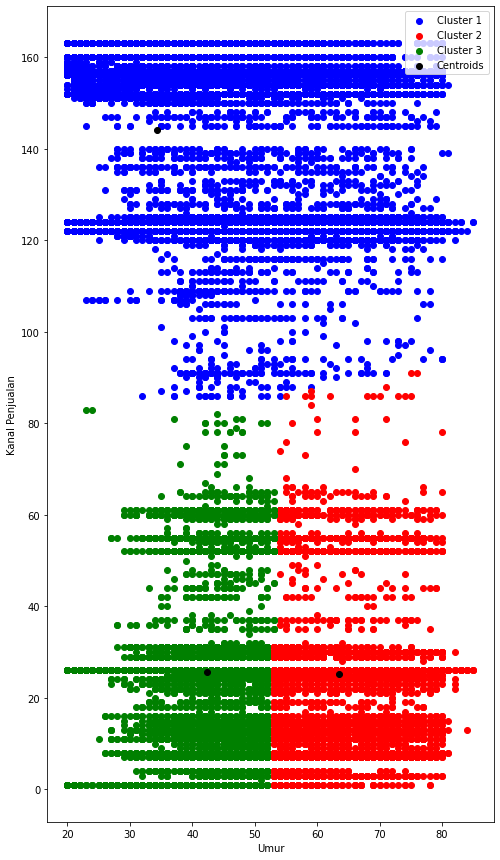

In [615]:
clusters, centroids = KMeans(3, data_used)

fig = plt.figure(figsize=(8,15))
ax1 = fig.add_subplot()

cluster1 = pd.DataFrame(clusters[0], columns=['Umur', 'Kanal_Penjualan'])
ax1.scatter(cluster1['Umur'], cluster1['Kanal_Penjualan'], c='blue', label='Cluster 1')
cluster2 = pd.DataFrame(clusters[1], columns=['Umur', 'Kanal_Penjualan'])
ax1.scatter(cluster2['Umur'] ,cluster2['Kanal_Penjualan'], c='red', label = 'Cluster 2')
cluster3 = pd.DataFrame(clusters[2], columns=['Umur', 'Kanal_Penjualan'])
ax1.scatter(cluster3['Umur'], cluster3['Kanal_Penjualan'], c='green', label = 'Cluster 3')
centroids_df = pd.DataFrame(centroids, columns=['Umur', 'Kanal_Penjualan'])
ax1.scatter(centroids_df['Umur'], centroids_df['Kanal_Penjualan'], c='black', label = 'Centroids')
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.legend(loc='upper right')
plt.show()

# Evaluation

### K-Means algorithm with considering wcss

In [616]:
def KMeans_with_wcss(K, data_used):
    stop = False
    # Select K Points as initial centroids
    centroids = data_used.sample(n=K).values.tolist()
    wcss_val = []
    while not stop:
        clusters = [[] for _ in range(K)]
        wcss = []
        ## Form K clusters by assigning each point to its closest centroids
        for row in data_used.values.tolist():
            min_dist = 10**128
            min_centroids = -1
            for i in range(len(centroids)):
                dist = euclid_dist(centroids[i], row)
                if dist < min_dist:
                    min_centroids = i
                    min_dist = dist
            clusters[min_centroids].append(row)
            wcss.append(min_dist)
        wcss_val.append(sum(wcss))
        ## Recompute the centroid of each clusters
        temp_centroid = copy.deepcopy(centroids)
        for i in range(len(centroids)):
            centroids[i] = np.mean(clusters[i], axis = 0)
        condition = np.array(centroids) == np.array(temp_centroid)
        # print(condition)
        if condition.all():
            stop = True

    return clusters, centroids, wcss_val

### Visualize every model with k-cluster

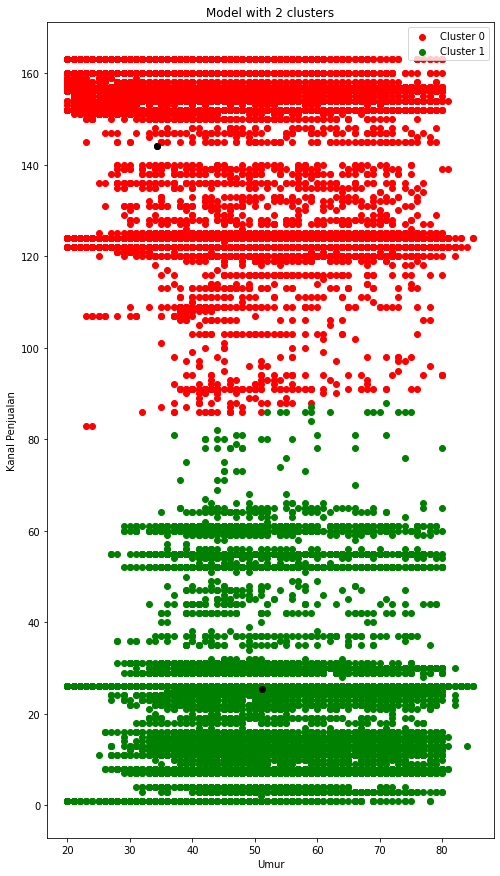

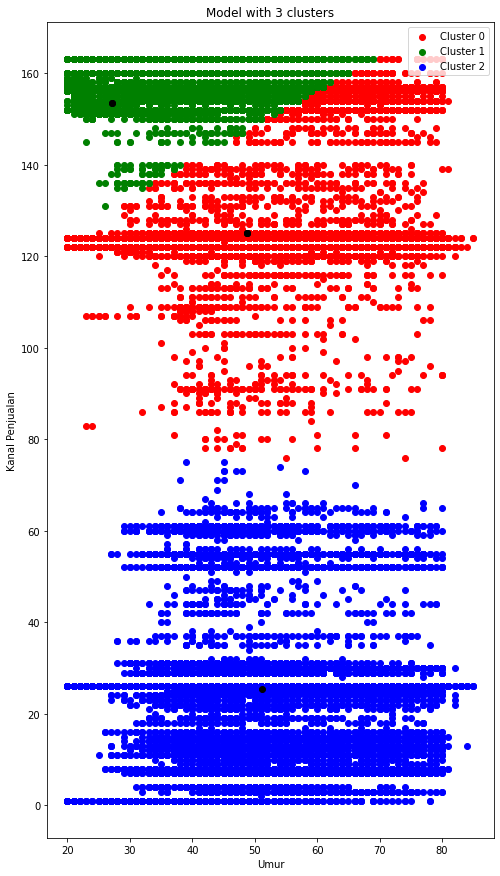

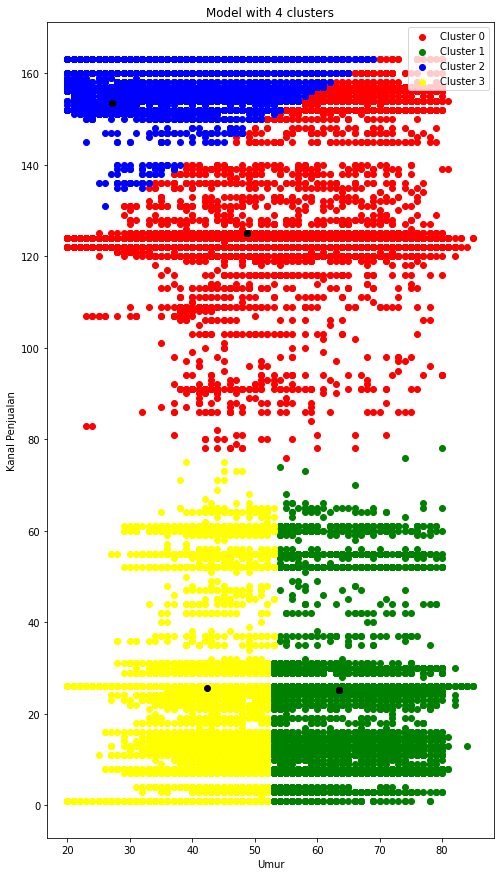

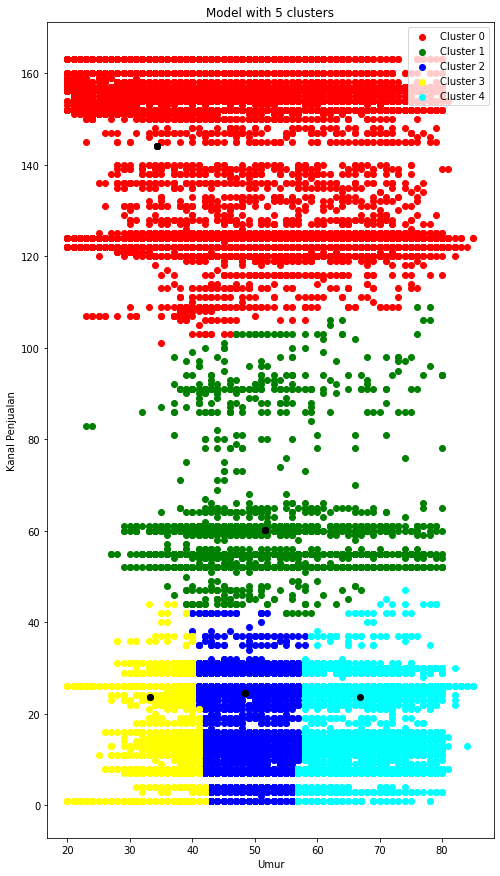

In [617]:
# fig = plt.figure(figsize=(8,15))
# ax = fig.add_subplot()
color_list = ['red', 'green', 'blue', 'yellow', 'cyan']
for K in range(2,6):
    clusters, centroids, wcss_val = KMeans_with_wcss(K, data_used)
    fig = plt.figure(figsize=(8,15))
    ax = fig.add_subplot()
    for i in range(len(clusters)):
        cluster_df = pd.DataFrame(clusters[i], columns=['Umur', 'Kanal_Penjualan'])
        centroids_df = pd.DataFrame(centroids, columns=['Umur', 'Kanal_Penjualan'])
        color = color_list[i]
        ax.scatter(cluster_df['Umur'], cluster_df['Kanal_Penjualan'], color=color, label=f'Cluster {i}')
        ax.scatter(centroids_df['Umur'], centroids_df['Kanal_Penjualan'], color = 'black')
    plt.xlabel('Umur')
    plt.ylabel('Kanal Penjualan')
    plt.legend(loc='upper right')
    plt.title(f'Model with {K} clusters')
    plt.show()
        


### Assigning elbow points to use in Elbow method

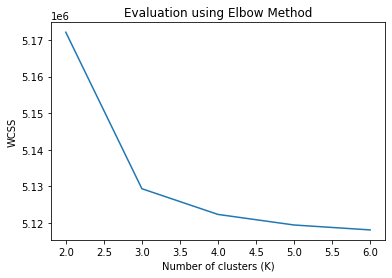

In [622]:
elbow_points = []
for i in range(10):
    if i % 2 != 0:
        elbow_points.append((wcss_val[i]+wcss_val[i+1]))
# Using the elbow method to find the optimal number of clusters
plt.plot(range(2,7), elbow_points)
plt.title('Evaluation using Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()